<a href="https://colab.research.google.com/github/Yunpei24/DeepLearning/blob/main/MonpremierReseauNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Par l'algorithme de la descente du Gradiant

*   A= fonction d'activation ici c'est la fonction sigmoide
*   Z= fonction linéaire, fonction de prédiction
*   W= poids affecté à chaque entrée
*    


In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension de X: (100, 2)
dimension de y: (100, 1)


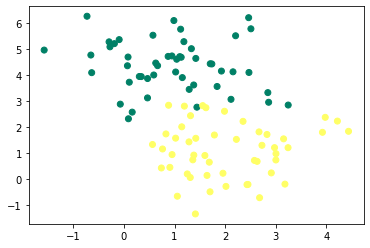

In [90]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print("dimension de X:", X.shape)
print("dimension de y:", y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [91]:
# fonction d'initialisation
def initialisation(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)

In [92]:
#Fonction modèle
def model(X, W, b):
  Z = X.dot(W) + b  # (matrice X)*(matrice W)
  A = 1 / (1 + np.exp(-Z))
  return A

In [93]:
# Fonction Cout
def log_loss(A, y):
  return 1 / len(y) * np.sum(-y*np.log(A)-(1 - y)*np.log(1 - A))

np.dot(Matrices) est utilisée pour effectuer une multiplication matricielle en Python

In [94]:
def gradients(A, X, y):
  dW = 1 / len(y) * np.dot(X.T, A - y) # X.T est la transposée de X
  db = 1 / len(y) * np.sum(A - y)
  return (dW, db)

In [95]:
def update(dW, db, W, b, learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)

In [96]:
def predict(X, W, b):
  A = model(X, W, b)
  print(A)
  return A >= 0.5

In [101]:
def artificial_neuron(X, y, learning_rate=0.1, nbre_iteration=100):
  #initialisation de W et b
  W, b = initialisation(X)
  #historique = [] #sauvegarder toute l'historique de l'apprentissage
  Loss = [] # facultatif

  for i in range(nbre_iteration):
    A = model(X, W, b)
    Loss.append(log_loss(A, y))
    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate)
    #historique.append([W, b, Loss, i])

  y_predict = predict(X, W, b)
  print("Performance du modèle: ", accuracy_score(y, y_predict))
  
  plt.plot(Loss)
  plt.show()

  #return historique
  return (W, b)

In [ ]:
W, b = artificial_neuron(X, y)

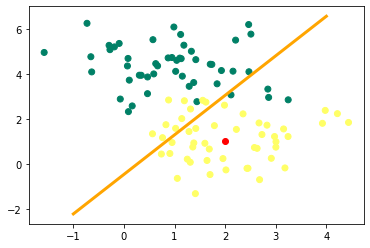

[0.9060714]


array([ True])

In [99]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3)
plt.show()

predict(new_plant, W, b)